## 1.Read the data as an appropriate Time Series data and plot the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

1. Read the data as an appropriate Time Series data and plot the data.

In [2]:
spark = pd.read_csv("Sparkling.csv")

In [3]:
spark.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [4]:
spark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [5]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')

In [6]:
spark['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
spark.head()

,YearMonth,Sparkling,Time_Stamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


In [7]:
spark['Time_Stamp'] = pd.to_datetime(spark['Time_Stamp'])

In [8]:
sparkdf= spark.set_index('Time_Stamp')
sparkdf.drop(['YearMonth'], axis=1, inplace=True)
sparkdf.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


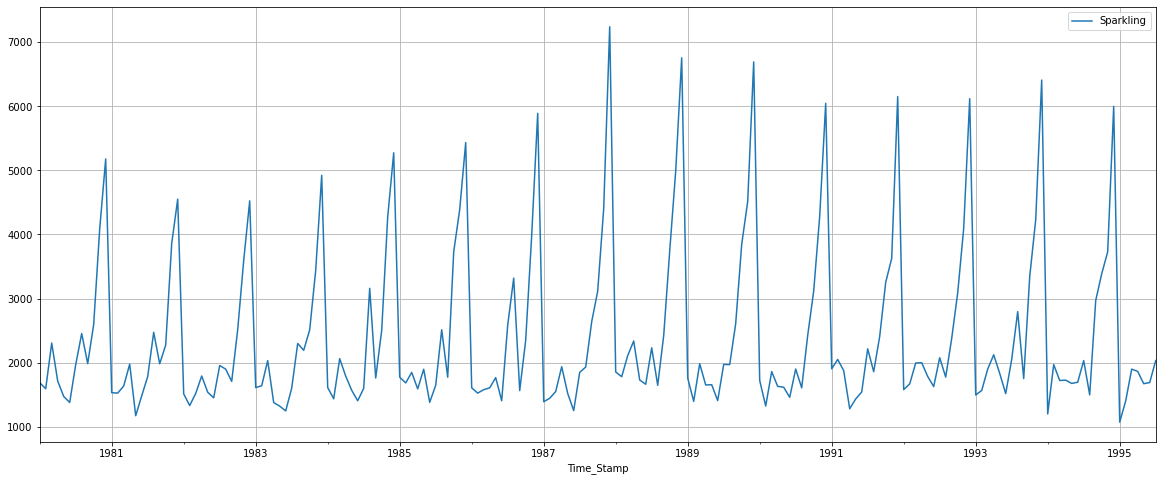

In [9]:
sparkdf.plot(figsize=(20,8))
plt.grid()

We can see that there is a trend with a seasonal pattern which is not constant in nature.
We have a particular pattern repeating every year, which shows that we have a yearly seasonality for the given series

# 2.  Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [10]:
print("The number of rows: ",sparkdf.shape[0])
print("The number of rows: ",sparkdf.shape[0])

The number of rows:  187
The number of rows:  187


In [11]:
sparkdf.isna().sum()

Sparkling    0
dtype: int64

It is evident that there are no missing values.

In [12]:
sparkdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


## Check the basic measures of descriptive statistics of the Time Series

In [13]:
round(sparkdf.describe(),3)

,Sparkling
count,187.000
mean,2402.417
std,1295.112
min,1070.000
25%,1605.000
50%,1874.000
75%,2549.000
max,7242.000


Time series not is stationary because it does not have a well-defined mean or variance

Plot a boxplot to understand the spread of sales across different years and within different months across years.

Yearly Boxplot-trend

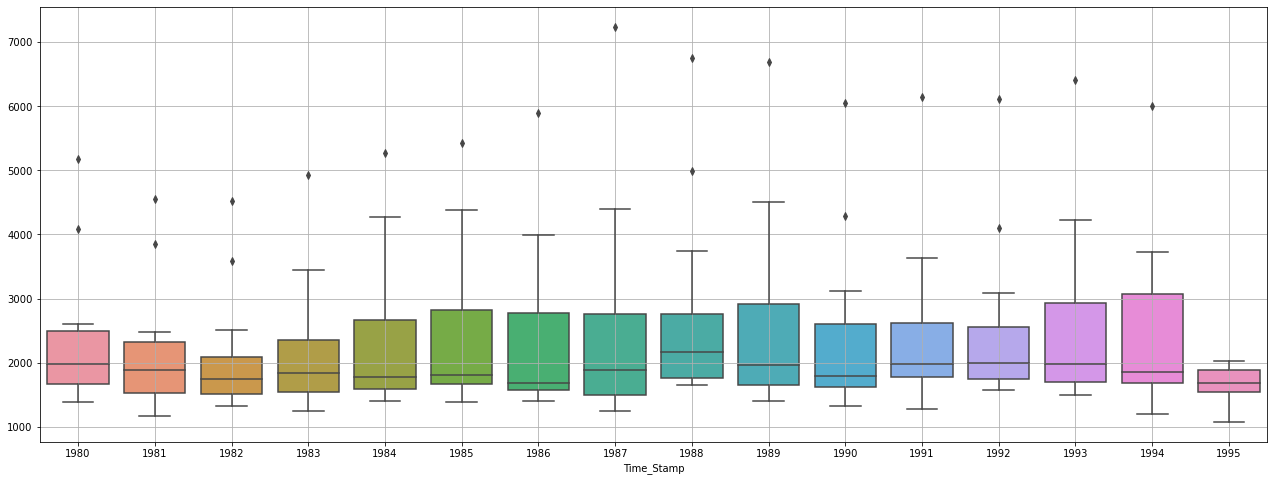

In [14]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = sparkdf.index.year,y = sparkdf.values[:,0],ax=ax)
plt.grid();

Monthly Boxplot-seasonality

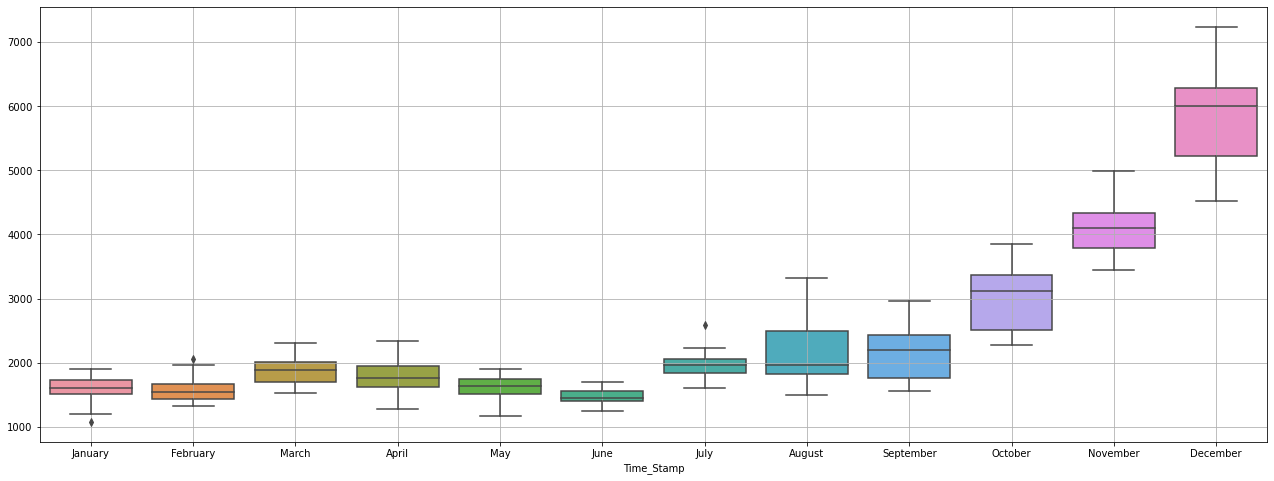

In [15]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = sparkdf.index.month_name(),y = sparkdf.values[:,0],ax=ax)
plt.grid();

We see that there is maximum Sparkling wine sales in the month of December, which can be attributed to the holiday discounts season.

Plot a graph of monthly sales across years.

In [16]:
monthly_sales_across_years = pd.pivot_table(sparkdf, values = 'Sparkling', columns = sparkdf.index.month_name(), index = sparkdf.index.year)
monthly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
1980,1712.0,2453.0,5179.0,1591.0,1686.0,1966.0,1377.0,2304.0,1471.0,4087.0,2596.0,1984.0
1981,1976.0,2472.0,4551.0,1523.0,1530.0,1781.0,1480.0,1633.0,1170.0,3857.0,2273.0,1981.0
1982,1790.0,1897.0,4524.0,1329.0,1510.0,1954.0,1449.0,1518.0,1537.0,3593.0,2514.0,1706.0
1983,1375.0,2298.0,4923.0,1638.0,1609.0,1600.0,1245.0,2030.0,1320.0,3440.0,2511.0,2191.0
1984,1789.0,3159.0,5274.0,1435.0,1609.0,1597.0,1404.0,2061.0,1567.0,4273.0,2504.0,1759.0
1985,1589.0,2512.0,5434.0,1682.0,1771.0,1645.0,1379.0,1846.0,1896.0,4388.0,3727.0,1771.0
1986,1605.0,3318.0,5891.0,1523.0,1606.0,2584.0,1403.0,1577.0,1765.0,3987.0,2349.0,1562.0
1987,1935.0,1930.0,7242.0,1442.0,1389.0,1847.0,1250.0,1548.0,1518.0,4405.0,3114.0,2638.0
1988,2336.0,1645.0,6757.0,1779.0,1853.0,2230.0,1661.0,2108.0,1728.0,4988.0,3740.0,2421.0


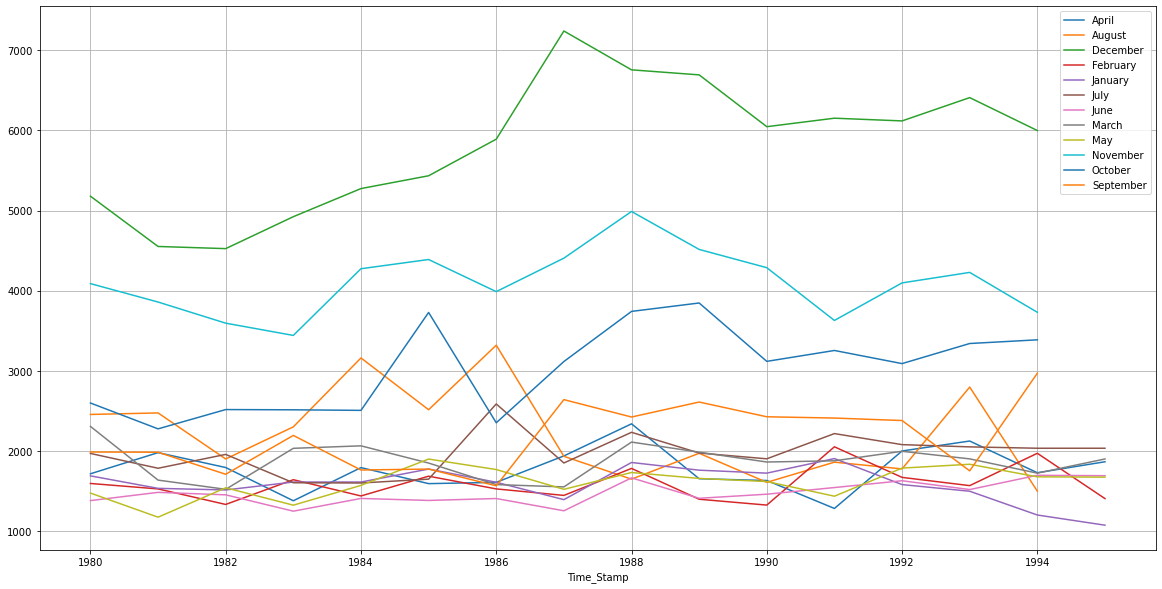

In [17]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

From the graph also, we can conclude that December has the highest sales across years.

Plot a monthplot of the give Time Series.

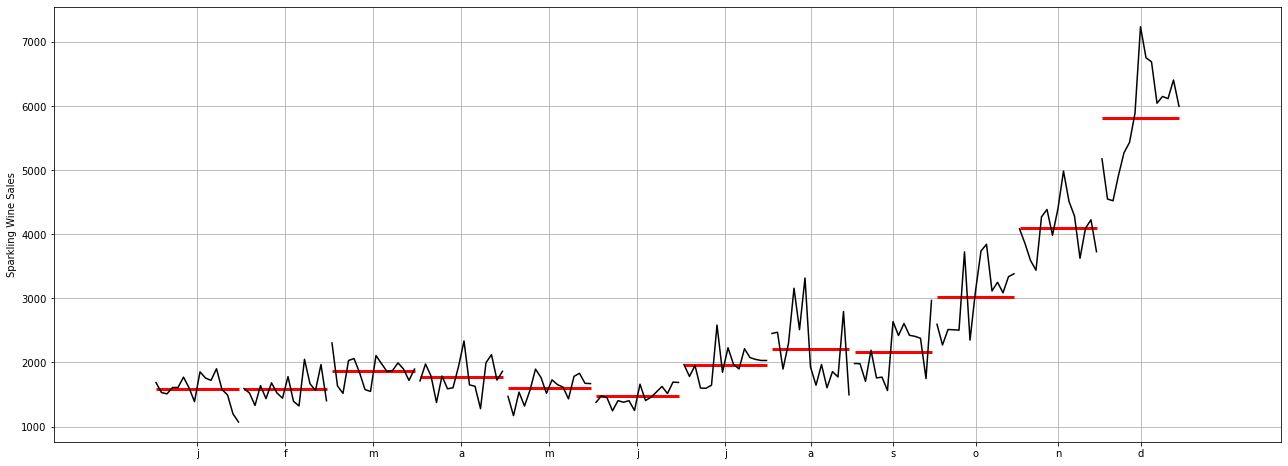

In [18]:
from statsmodels.graphics.tsaplots import month_plot
fig, ax = plt.subplots(figsize=(22,8))
month_plot(sparkdf,ylabel='Sparkling Wine Sales',ax=ax)
plt.grid();

Decomposition

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

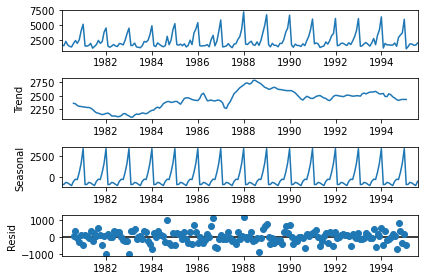

In [20]:
decomposition_add = seasonal_decompose(sparkdf,model='additive')
decomposition_add.plot();

In [21]:
trend = decomposition_add.trend
seasonality = decomposition_add.seasonal
residual = decomposition_add.resid
observed=decomposition_add.observed

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')
print('Observed','\n',observed.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

The series is additive

# 3. Split the data into training and test. The test data should start in 1991.

In [22]:
train_spark=sparkdf[sparkdf.index.year < 1991]
test_spark=sparkdf[sparkdf.index.year >= 1991]

In [23]:
print(train_spark.shape)
print(test_spark.shape)

(132, 1)
(55, 1)


In [24]:
from IPython.display import display

In [25]:
print('First few rows of Training Data')
display(train_spark.head())
print('Last few rows of Training Data')
display(train_spark.tail())
print('First few rows of Test Data')
display(test_spark.head())
print('Last few rows of Test Data')
display(test_spark.tail())

First few rows of Training Data


,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


Last few rows of Training Data


,Sparkling
Time_Stamp,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


First few rows of Test Data


,Sparkling
Time_Stamp,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432


Last few rows of Test Data


,Sparkling
Time_Stamp,
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670
1995-06-30,1688
1995-07-31,2031


4.Build various exponential smoothing models on the training data and evaluate the model
using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc

Building different models and comparing the accuracy metrics.

Model 1: Linear Regression

For this particular linear regression, we are going to regress the 'Sparkling' variable against 
the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [26]:
train_time_spark = [i+1 for i in range(len(train_spark))]
test_time_spark= [i+133 for i in range(len(test_spark))]
print('Training Time instance','\n',train_time_spark)
print('Test Time instance','\n',test_time_spark)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set.
Now we will add these values in the training and test set.

In [27]:
LinearRegression_train_spark = train_spark.copy()
LinearRegression_test_spark = test_spark.copy()

In [28]:
LinearRegression_train_spark['time'] = train_time_spark
LinearRegression_test_spark['time'] = test_time_spark

print('First few rows of Training Data','\n',LinearRegression_train_spark.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train_spark.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test_spark.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test_spark.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



Now that our training and test data has been modified, let us go ahead use  𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛
to build the model on the training data and test the model on the test data.

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(LinearRegression_train_spark[['time']],LinearRegression_train_spark['Sparkling'].values)

LinearRegression()

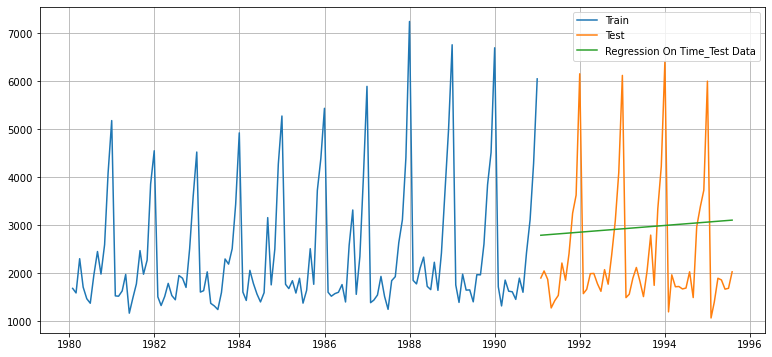

In [32]:
test_predictions_model1  = lr.predict(LinearRegression_test_spark[['time']])
LinearRegression_test_spark['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train_spark['Sparkling'], label='Train')
plt.plot(test_spark['Sparkling'], label='Test')
plt.plot(LinearRegression_test_spark['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

Defining the accuracy metrics.

In [33]:
from sklearn import metrics

In [34]:
## Test Data - RMSE - Sparkling

rmse_model1_test1 = metrics.mean_squared_error(test_spark['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test1))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [35]:
resultsDf= pd.DataFrame({'Test RMSE': [rmse_model1_test1]},index=['Linear Regression'])
resultsDf

,Test RMSE
Linear Regression,1389.135175


Model 2: Naive Approach:

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction 
for day after tomorrow is tomorrow and since the prediction of tomorrow 
is same as today,therefore the prediction for day after tomorrow is also today.

In [36]:
NaiveModel_train_spark = train_spark.copy()
NaiveModel_test_spark = test_spark.copy()

In [37]:
NaiveModel_test_spark['naive'] = np.asarray(train_spark['Sparkling'])[len(np.asarray(train_spark['Sparkling']))-1]
NaiveModel_test_spark['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

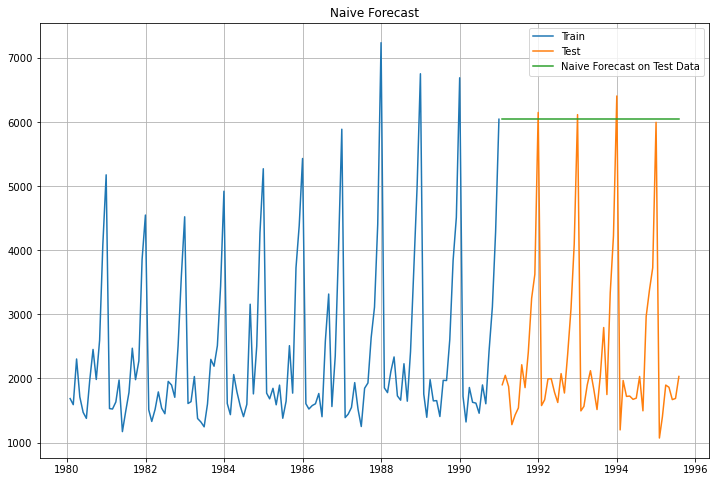

In [38]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train_spark['Sparkling'], label='Train')
plt.plot(test_spark['Sparkling'], label='Test')
plt.plot(NaiveModel_test_spark['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

Model Evaluation

In [39]:
## Test Data - RMSE - Sparkling

rmse_model2_test1 = metrics.mean_squared_error(test_spark['Sparkling'],NaiveModel_test_spark['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data-Sparkling,  RMSE is %3.3f" %(rmse_model2_test1))

For RegressionOnTime forecast on the Test Data-Sparkling,  RMSE is 3864.279


In [40]:
resultsDf1 = pd.DataFrame({'Test RMSE': [rmse_model2_test1]},index=['NaiveModel'])
resultsDf = pd.concat([resultsDf, resultsDf1])
resultsDf

,Test RMSE
Linear Regression,1389.135175
NaiveModel,3864.279352


Method 3: Simple Average

For this particular simple average method, we will forecast by using the average of the training values.

In [41]:
SimpleAverage_train = train_spark.copy()
SimpleAverage_test = test_spark.copy()

In [42]:
SimpleAverage_test['mean_forecast'] = train_spark['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
Time_Stamp,,
1991-01-31,1902,2403.780303
1991-02-28,2049,2403.780303
1991-03-31,1874,2403.780303
1991-04-30,1279,2403.780303
1991-05-31,1432,2403.780303


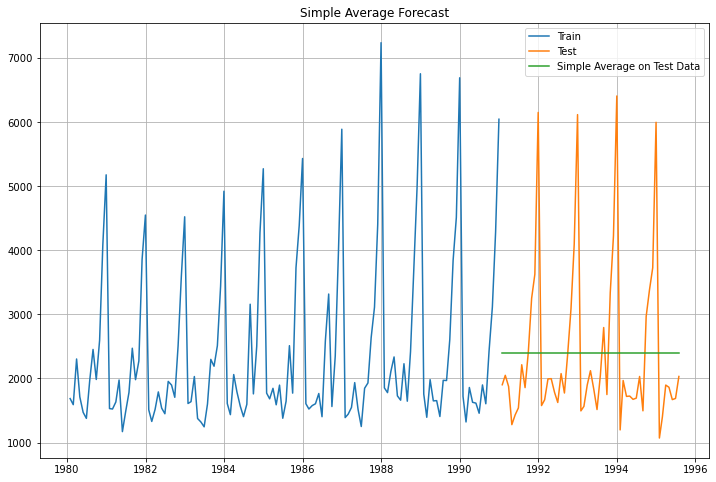

In [43]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

Model Evaluation

In [44]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test_spark['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [45]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
Linear Regression,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


# Method 4: Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals.
The best interval can be determined by the maximum accuracy (or the minimum error) over here.

For Moving Average, we are going to average over the entire data.

In [46]:
MovingAverage = sparkdf.copy()
MovingAverage.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [47]:
#### Trailing moving averages


MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,1686,NaN,NaN,NaN,NaN
1980-02-29,1591,1638.5,NaN,NaN,NaN
1980-03-31,2304,1947.5,NaN,NaN,NaN
1980-04-30,1712,2008.0,1823.25,NaN,NaN
1980-05-31,1471,1591.5,1769.50,NaN,NaN


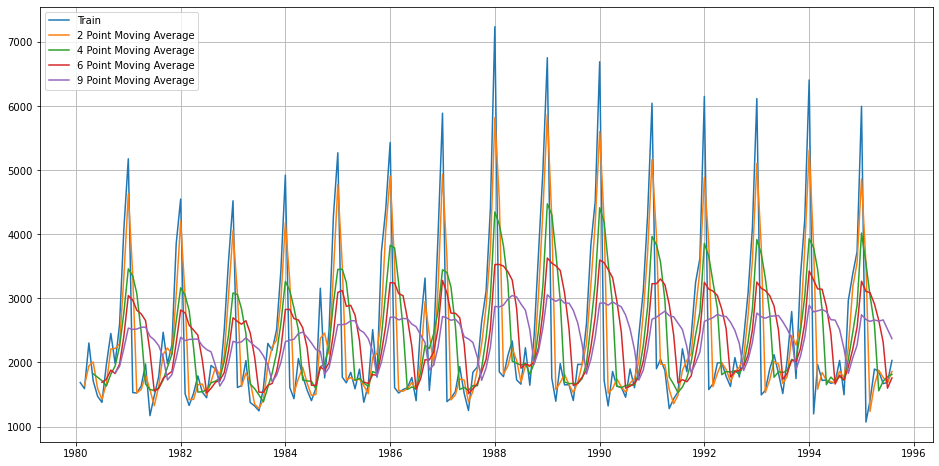

In [48]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();


Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be 
carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [49]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

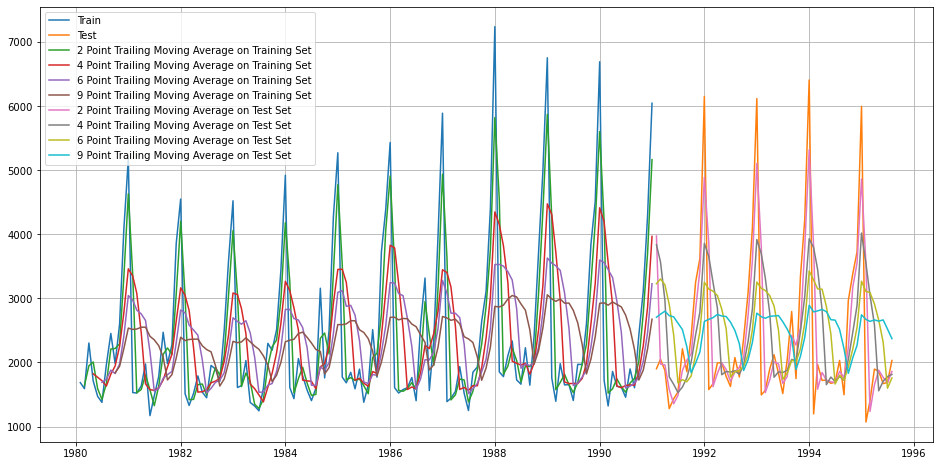

In [50]:

## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [51]:
### Model Evaluation

##### Done only on the test data.

## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test_spark['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test_spark['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test_spark['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test_spark['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


In [52]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf


,Test RMSE
Linear Regression,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315


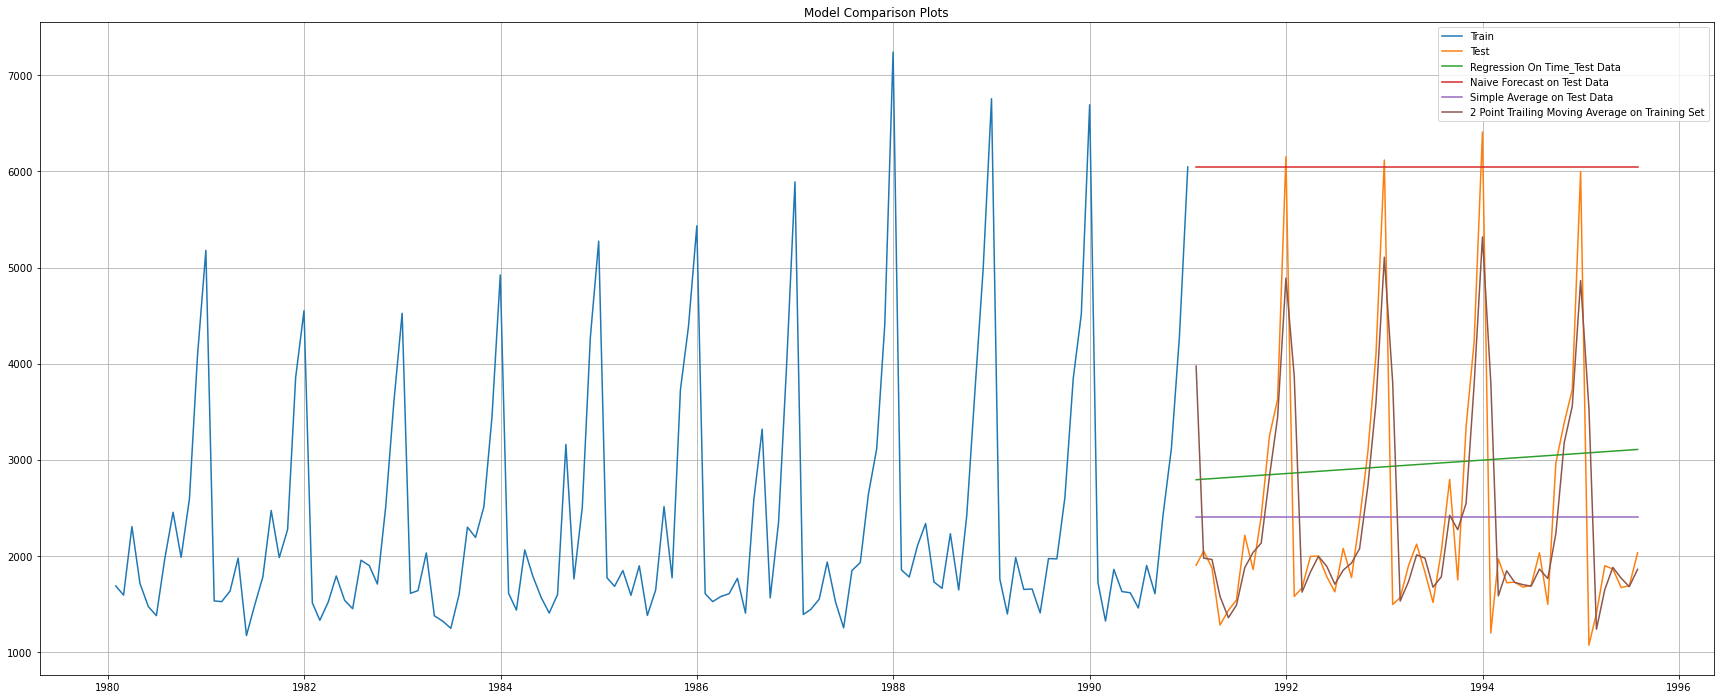

In [53]:
## Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train_spark['Sparkling'], label='Train')
plt.plot(test_spark['Sparkling'], label='Test')
plt.plot(LinearRegression_test_spark['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(NaiveModel_test_spark['naive'], label='Naive Forecast on Test Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [54]:
## Method 5: Simple Exponential Smoothing

In [55]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [56]:
SES_train = train_spark.copy()
SES_test = test_spark.copy()

In [57]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

In [58]:
model_SES_autofit = model_SES.fit(optimized=True)

In [59]:
model_SES_autofit.params

{'smoothing_level': 0.04960659880745982,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.5047538435374,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [60]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test_spark))
SES_test.head()

,Sparkling,predict
Time_Stamp,,
1991-01-31,1902,2724.929339
1991-02-28,2049,2724.929339
1991-03-31,1874,2724.929339
1991-04-30,1279,2724.929339
1991-05-31,1432,2724.929339


In [61]:
### Model Evaluation for $\alpha$ = 0.05 : Simple Exponential Smoothing
## Test Data
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.05 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.05 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


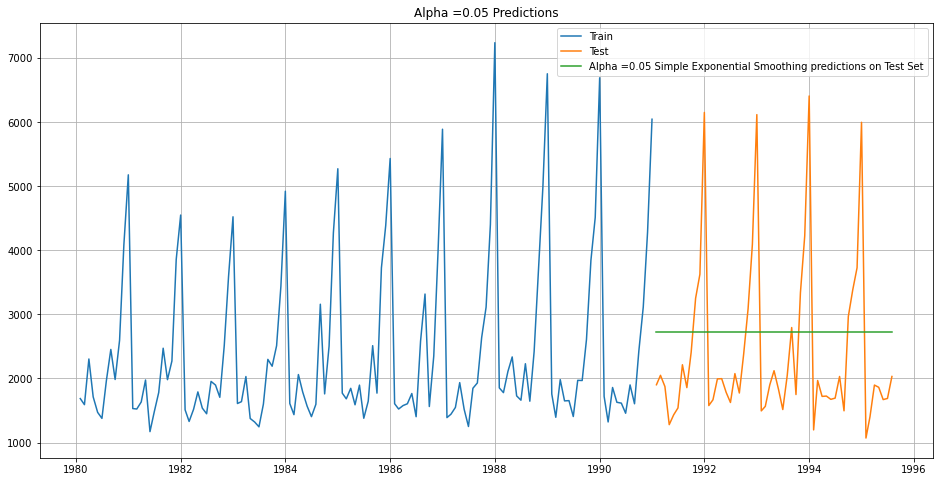

In [62]:
## Plotting on both the Training and Test data
plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')
plt.plot(SES_test['predict'], label='Alpha =0.05 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.05 Predictions');

In [63]:
resultsDf_5_1 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.05,SimpleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_5_1])
resultsDf

,Test RMSE
Linear Regression,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.05,SimpleExponentialSmoothing",1316.034674


# Setting different alpha values.
Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.
We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [64]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Test RMSE


In [65]:
for i in np.arange(0.01,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test_spark))
    
    rmse_model2_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_model = resultsDf_model.append({'Alpha Values':i
                                              ,'Test RMSE':rmse_model2_test_i}, ignore_index=True)

In [66]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Test RMSE
1,0.02,1279.495201
0,0.01,1281.032699
2,0.03,1293.110073
3,0.04,1305.462953
4,0.05,1316.411742
...,...,...
94,0.95,3778.432623
95,0.96,3796.048620
96,0.97,3813.437370
97,0.98,3830.602869


In [67]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][1]]}
                              ,index=['Alpha=0.02,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
Linear Regression,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.05,SimpleExponentialSmoothing",1316.034674
"Alpha=0.02,SimpleExponentialSmoothing",1279.495201


In [68]:
# setting alpha value based on recent observation.(alpha > 0.5)

In [69]:
model_SES1 = SimpleExpSmoothing(SES_train['Sparkling']).fit(smoothing_level=0.53,optimized=True)

In [70]:
SES_test['predict'] = model_SES1.forecast(steps=len(test_spark))

In [71]:
### Model Evaluation for $\alpha$ = 0.5 : Simple Exponential Smoothing
## Test Data
rmse_model5_test_2 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.53 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_2))

For Alpha =0.53 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 2764.804


In [72]:
resultsDf_5_2 = pd.DataFrame({'Test RMSE': [rmse_model5_test_2]},index=['Alpha=0.53,SimpleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_5_2])
resultsDf

,Test RMSE
Linear Regression,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.05,SimpleExponentialSmoothing",1316.034674
"Alpha=0.02,SimpleExponentialSmoothing",1279.495201
"Alpha=0.53,SimpleExponentialSmoothing",2764.803783


It is evident that, for greater values of alpha, RMSE values are also increasing gradually. Thus this model considers 
only historical values rather than recent observations.

# Method 6: Double Exponential Smoothing (Holt's Model)

In [73]:
##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.
DES_train = train_spark.copy()
DES_test = test_spark.copy()

In [74]:
model_DES = Holt(DES_train['Sparkling'])

In [75]:
model_DES_autofit = model_DES.fit(optimized=True)

In [76]:
model_DES_autofit.params

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [77]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test_spark))

In [78]:
## Test Data
rmse_model6_test_1 = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict'],squared=False)
print("For Alpha =0.7,Beta=0,Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha =0.7,Beta=0,Double Exponential Smoothing Model forecast on the Test Data, RMSE is 2007.239


In [79]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]},index=['Alpha=0.7,Beta=0,Double ExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE
Linear Regression,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.05,SimpleExponentialSmoothing",1316.034674
"Alpha=0.02,SimpleExponentialSmoothing",1279.495201
"Alpha=0.53,SimpleExponentialSmoothing",2764.803783


#setting different alpha and beta values

In [80]:
## First we will define an empty dataframe to store our values from the loop
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Beta Values,Test RMSE


In [81]:
for i in np.arange(0.01,1,0.01):
    for j in np.arange(0.01,1,0.01):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test_spark))
        rmse_model6_test_2 = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j,'Test RMSE':rmse_model6_test_2}, ignore_index=True)

In [82]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Test RMSE
148,0.02,0.50,1274.630824
115,0.02,0.17,1275.105310
254,0.03,0.57,1276.025836
255,0.03,0.58,1278.425944
253,0.03,0.56,1278.585750
...,...,...,...
2175,0.22,0.97,60335.137153
2077,0.21,0.98,60589.909084
2176,0.22,0.98,60740.944412
2177,0.22,0.99,61104.414936


In [83]:
DES_resultsDf_1 = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                              ,index=['Alpha=0.02&Beta=0.50,DoubleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, DES_resultsDf_1])
resultsDf

,Test RMSE
Linear Regression,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.05,SimpleExponentialSmoothing",1316.034674
"Alpha=0.02,SimpleExponentialSmoothing",1279.495201
"Alpha=0.53,SimpleExponentialSmoothing",2764.803783


It is evident that, for greater values of alpha and Beta, RMSE values are also increasing gradually. Thus this model considers 
only historical values rather than recent observations.

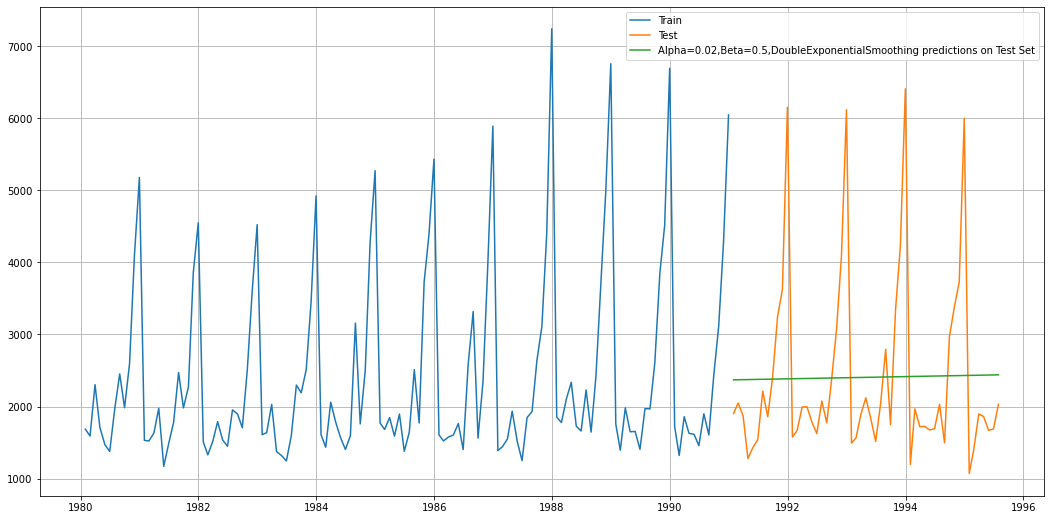

In [84]:
## Plotting on both the Training and Test data
plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')
plt.plot(DES_test['predict', 0.02, 0.5], label='Alpha=0.02,Beta=0.5,DoubleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

It is obvious that the time series follows linear trend.

#Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [85]:
##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality
#are accounted for in this model.
TES_train = train_spark.copy()
TES_test = test_spark.copy()

In [86]:
model_TES1 = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='additive',initialization_method='estimated')

In [87]:
model_TES2 = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',initialization_method='estimated')

In [88]:
model_TES1_autofit = model_TES1.fit()
#The above fit of the model is by the best parameters that Python thinks for the model.
#It uses a brute force method to choose the parameters.

In [89]:
model_TES1_autofit.params

{'smoothing_level': 0.11127217637327812,
 'smoothing_trend': 0.012360783071584381,
 'smoothing_seasonal': 0.46071776652565694,
 'damping_trend': nan,
 'initial_level': 2356.578251320923,
 'initial_trend': -0.018411364304245836,
 'initial_seasons': array([-636.23360483, -722.98346389, -398.64344213, -473.43050567,
        -808.42514177, -815.35007971, -384.2307263 ,   72.99508012,
        -237.44278503,  272.32584563, 1541.37820923, 2590.07753775]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [90]:
## Prediction on the test data
TES_test['auto_predict'] = model_TES1_autofit.forecast(steps=len(test_spark))

In [91]:
## Test Data
rmse_model7_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.11,Beta=0.01,Gamma=0.46, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model7_test_1))

For Alpha=0.11,Beta=0.01,Gamma=0.46, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 378.626


In [92]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [rmse_model7_test_1]}
                           ,index=['Alpha=0.11,Beta=0.01,Gamma=0.46,TripleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE
Linear Regression,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.05,SimpleExponentialSmoothing",1316.034674
"Alpha=0.02,SimpleExponentialSmoothing",1279.495201
"Alpha=0.53,SimpleExponentialSmoothing",2764.803783


Least RMSE value is achieved using additive seasonality of Triple Exponential smoothing model, but it considers historical 
values for alpha, beta and gamma.

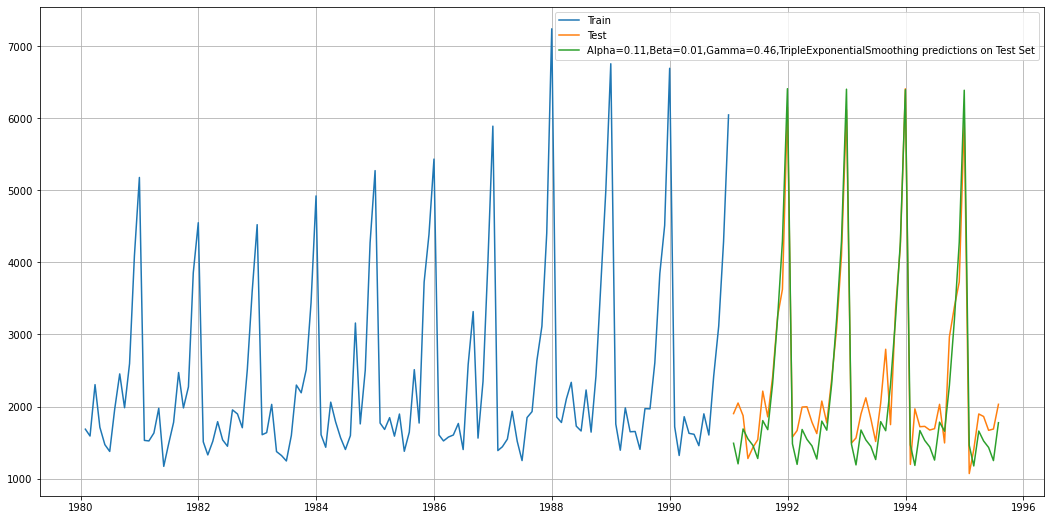

In [93]:
## Plotting on both the Training and Test using 
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')
plt.plot(TES_test['auto_predict'], label='Alpha=0.11,Beta=0.01,Gamma=0.46,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

Let us also check with multiplicative seasonality.

In [94]:
model_TES2_autofit = model_TES2.fit()
#The above fit of the model is by the best parameters that Python thinks for the model.
#It uses a brute force method to choose the parameters.

In [95]:
model_TES2_autofit.params

{'smoothing_level': 0.11116176789563663,
 'smoothing_trend': 0.04941147961648198,
 'smoothing_seasonal': 0.3620829442985507,
 'damping_trend': nan,
 'initial_level': 2356.4438369216005,
 'initial_trend': -9.878457836258185,
 'initial_seasons': array([0.7132279 , 0.68401392, 0.90382332, 0.80629725, 0.65673257,
        0.65499969, 0.88646369, 1.13381712, 0.92146802, 1.21224887,
        1.87888485, 2.3774218 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [96]:
## Prediction on the test data
TES_test['auto_predict'] = model_TES2_autofit.forecast(steps=len(test_spark))

In [97]:
## Test Data
rmse_model7_test_2 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.11,Beta=0.05,Gamma=0.36, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model7_test_2))

For Alpha=0.11,Beta=0.05,Gamma=0.36, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 403.583


In [98]:
resultsDf_7_2 = pd.DataFrame({'Test RMSE': [rmse_model7_test_2]}
                           ,index=['Alpha=0.11,Beta=0.05,Gamma=0.36,TripleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_7_2])
resultsDf

,Test RMSE
Linear Regression,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.05,SimpleExponentialSmoothing",1316.034674
"Alpha=0.02,SimpleExponentialSmoothing",1279.495201
"Alpha=0.53,SimpleExponentialSmoothing",2764.803783


comparatively high RMSE value is achieved using multiplicative seasonality of Triple Exponential smoothing model.

#Setting different alpha, beta and gamma values

In [99]:
## First we will define an empty dataframe to store our values from the loop
resultsDf_model_TES1 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Test RMSE': []})
resultsDf_model_TES1

,Alpha Values,Beta Values,Gamma Values,Test RMSE


In [100]:
for i in np.arange(0.3,1,0.1):
    for j in np.arange(0.3,1,0.1):
        for k in np.arange(0.3,1,0.1):
            model_TES_alpha_i_j_k = model_TES1.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test_spark))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_model_TES1 = resultsDf_model_TES1.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test}
                                                 , ignore_index=True)

In [101]:
resultsDf_model_TES1.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Gamma Values,Test RMSE,Train RMSE
99,0.5,0.3,0.4,6.491977e+02,477.403185
49,0.4,0.3,0.3,7.347181e+02,464.061379
151,0.6,0.3,0.7,9.264124e+02,569.835997
288,0.8,0.9,0.4,1.009321e+03,789.975321
21,0.3,0.6,0.3,1.116411e+03,535.025769
...,...,...,...,...,...
334,0.9,0.8,0.8,5.551303e+05,7280.200183
328,0.9,0.7,0.9,5.763978e+05,9274.376298
341,0.9,0.9,0.8,5.956534e+05,12728.423192
335,0.9,0.8,0.9,1.298367e+06,17221.031092


In [102]:
TES_resultsDf_2= pd.DataFrame({'Test RMSE': [resultsDf_model_TES1.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                              ,index=['Alpha=0.5,Beta=0.3,Gamma=0.4, Triple Exponential Smoothing'])
resultsDf = pd.concat([resultsDf, TES_resultsDf_2])
resultsDf

,Test RMSE
Linear Regression,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.05,SimpleExponentialSmoothing",1316.034674
"Alpha=0.02,SimpleExponentialSmoothing",1279.495201
"Alpha=0.53,SimpleExponentialSmoothing",2764.803783


## Plotting on both the Training and Test data
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')
plt.plot(TES_test['predict',0.1100000000000002,0.01000000000002,0.46], label='Alpha=0.11,Beta=0.01,Gamma=0.46,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [1132]:
print('Sorted by RMSE values on the Test Data:','\n',)
smoothing_df=resultsDf.sort_values(by=['Test RMSE'])
smoothing_df

Sorted by RMSE values on the Test Data: 



,Test RMSE
"Alpha=0.11,Beta=0.01,Gamma=0.46,TripleExponentialSmoothing",378.625761
"Alpha=0.11,Beta=0.05,Gamma=0.36,TripleExponentialSmoothing",403.583080
"Alpha=0.5,Beta=0.3,Gamma=0.4, Triple Exponential Smoothing",649.197748
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
"Alpha=0.02&Beta=0.50,DoubleExponentialSmoothing",1274.630824
SimpleAverageModel,1275.081804
"Alpha=0.02,SimpleExponentialSmoothing",1279.495201
6pointTrailingMovingAverage,1283.927428
"Alpha=0.05,SimpleExponentialSmoothing",1316.034674


For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work 
better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, since this was a
model building exercise we had gone on to build different models on the data and have compared these model with the 
best RMSE value(least accuracy) on the test data.

We see that the best model is the Triple Exponential Smoothing with additive seasonality with the parameters
$\alpha$ = 0.11, $\beta$ = 0.01 and $\gamma$ = 0.46

5.Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and
also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps
to make it stationary. Check the new data for stationarity and comment.

To check whether the data is stationary or not, we will perform a test called the Dickey-Fuller test. 
the Dickey-Fuller test (ADF) is used to test the null hypothesis, i.e. to check if a unit root is present 
in a sample of a time-series data. 

We end up deciding this based on the return of the p-value.

A small p-value which is considered below 0.05 indicates strong evidence against the null hypothesis,
thereby we reject the null hypothesis.

A large p-value which is considered above 0.05 indicates weak or no evidence against the null hypothesis, 
thereby we fail to reject the null hypothesis.

In [103]:
from statsmodels.tsa.stattools import adfuller

In [104]:
def check_adf(time_series):
    test_result = adfuller(time_series)
    print ('ADF Test:')
    labels = ['ADF Statistic','p-value','No. of Lags Used','Number of Observations Used']
    for value,label in zip(test_result,labels):
        print (label+': '+str(value))
    if test_result [1] <= 0.05:
        print ("Reject null hypothesis and data is stationary")
    else:
        print ("fail to reject H0 and data is non-stationary ")

In [105]:
check_adf(sparkdf['Sparkling'])

ADF Test:
ADF Statistic: -1.3604974548123379
p-value: 0.6010608871634849
No. of Lags Used: 11
Number of Observations Used: 175
fail to reject H0 and data is non-stationary 


We see that the series is not stationary at  𝛼  = 0.05.

In [106]:
check_adf((sparkdf['Sparkling']).diff().dropna())

ADF Test:
ADF Statistic: -45.050300936195306
p-value: 0.0
No. of Lags Used: 10
Number of Observations Used: 175
Reject null hypothesis and data is stationary


We see that after taking a difference of order 1 the series have become stationary at  𝛼  = 0.05.

6.Build an automated version of the ARIMA/SARIMA model in which the parameters are selected 
using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

Initially, we build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

 Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes 
we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.


In [107]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [108]:
# Creating an empty Dataframe with column names only
ARIMA_AIC =pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [109]:
from statsmodels.tsa.arima_model import ARIMA

In [110]:
for param in pdq:
    ARIMA_model = ARIMA(train_spark['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.90643726763
ARIMA(0, 1, 2) - AIC:2232.7830976842542
ARIMA(1, 1, 0) - AIC:2268.5280605652692
ARIMA(1, 1, 1) - AIC:2235.013945349695
ARIMA(1, 1, 2) - AIC:2233.5976471196977
ARIMA(2, 1, 0) - AIC:2262.0356005526905
ARIMA(2, 1, 1) - AIC:2232.3604898830527
ARIMA(2, 1, 2) - AIC:2210.6178944529283


In [111]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2210.617894
7,"(2, 1, 1)",2232.360490
2,"(0, 1, 2)",2232.783098
5,"(1, 1, 2)",2233.597647
4,"(1, 1, 1)",2235.013945
6,"(2, 1, 0)",2262.035601
1,"(0, 1, 1)",2264.906437
3,"(1, 1, 0)",2268.528061
0,"(0, 1, 0)",2269.582796


In [112]:
auto_ARIMA = ARIMA(train_spark['Sparkling'], order=(2,1,2),freq='M')
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.606
Date:                Wed, 09 Dec 2020   AIC                           2210.618
Time:                        18:13:00   BIC                           2227.869
Sample:                    02-29-1980   HQIC                          2217.628
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5857      0.517     10.814      0.000       4.573       6.598
ar.L1.D.Sparkling     1.2699      0.074     17.046      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

In [113]:
## Predict on the Test Set using this model and evaluate the model.
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_spark))

In [114]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test_spark['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1374.6782304197766


In [115]:
resultsDf_arima= pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])
resultsDf = pd.concat([resultsDf,resultsDf_arima])
resultsDf

,Test RMSE
Linear Regression,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.05,SimpleExponentialSmoothing",1316.034674
"Alpha=0.02,SimpleExponentialSmoothing",1279.495201
"Alpha=0.53,SimpleExponentialSmoothing",2764.803783


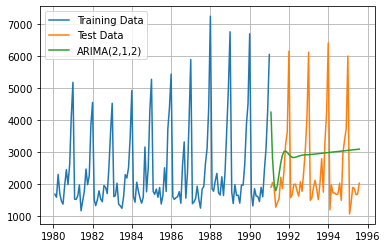

In [116]:
plt.plot(train_spark,label='Training Data')
plt.plot(test_spark,label='Test Data')
plt.plot(test_spark.index,predicted_auto_ARIMA[0],label='ARIMA(2,1,2)')
plt.legend(loc='best')
plt.grid();

Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

In [117]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

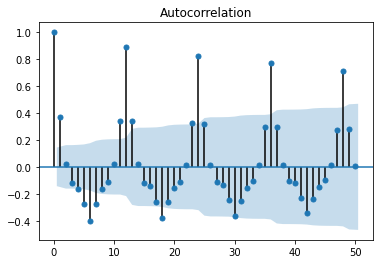

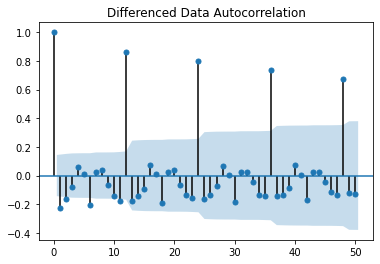

In [118]:
plot_acf(sparkdf['Sparkling'],lags=50)
plot_acf(sparkdf['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [119]:
## Seasonality after certain lags is visible. Every 12th 

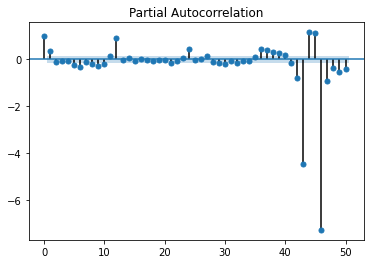

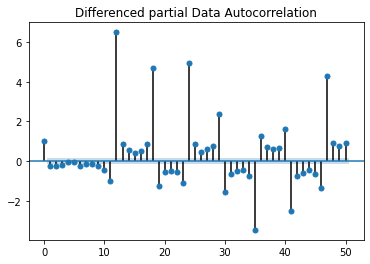

In [120]:
plot_pacf(sparkdf['Sparkling'],lags=50)
plot_pacf(sparkdf['Sparkling'].diff().dropna(),lags=50,title='Differenced partial Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 12.
We will run our auto SARIMA models by setting seasonality as 12.

In [121]:
### Setting the seasonality as 12 for the auto SARIMA model.
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))


Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [122]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [123]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_spark['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616843882
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640232958
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.990530137247
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.210873594022
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054160641094
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898054509667
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505994
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.768864961156
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572768368
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881792787
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0973022264961
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1319654186516
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954504864
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245087330364
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.3683740474253
SARIMA(0, 1, 

In [124]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.584247
53,"(1, 1, 2)","(2, 0, 2, 12)",1556.080256
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.121564
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.160319
80,"(2, 1, 2)","(2, 0, 2, 12)",1557.840129


In [125]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train_spark['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Wed, 09 Dec 2020   AIC                           1555.584
Time:                                    18:16:14   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6281      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

In [168]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

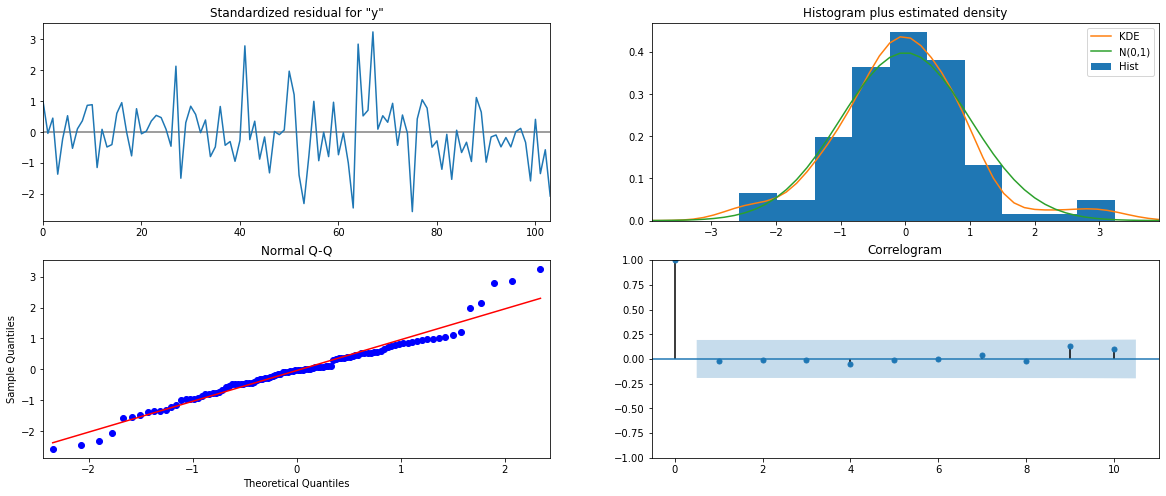

In [169]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

Inferences:
Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Top Right: The density plot suggest normal distribution with mean zero.

Bottom left: All the dots do not fall perfectly in line with the red line would imply the distribution is skewed.

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated.

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and 
thus we cannot develop any pattern from these plots. 

In [128]:
## Predict on the Test Set using this model and evaluate the model.
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test_spark))

In [129]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1327.378467,388.345865,566.234558,2088.522377
1,1315.151372,402.011607,527.223101,2103.079643
2,1621.605580,402.005209,833.689850,2409.521311
3,1598.893532,407.242982,800.711955,2397.075109
4,1392.711558,407.972879,593.099409,2192.323707


In [130]:
rmse_sarima_12 = mean_squared_error(test_spark['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse_sarima_12)

528.5911049822637


In [131]:
sarima_resultsDf = pd.DataFrame({'Test RMSE': [rmse_sarima_12]}
                           ,index=['SARIMA(1,1,2)(1,0,2,12)'])
resultsDf = pd.concat([resultsDf,sarima_resultsDf])
resultsDf

,Test RMSE
Linear Regression,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.05,SimpleExponentialSmoothing",1316.034674
"Alpha=0.02,SimpleExponentialSmoothing",1279.495201
"Alpha=0.53,SimpleExponentialSmoothing",2764.803783


We see that we have huge gain the RMSE value by including the seasonal parameters as well.

7.Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the 
training data and evaluate this model on the test data using RMSE.

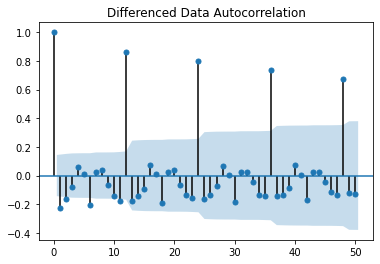

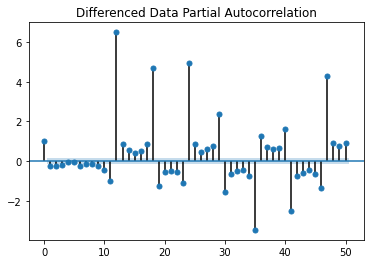

In [132]:
## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.
#Let us look at the ACF and the PACF plots once more.
plot_acf(sparkdf['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(sparkdf['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the lag at which the PACF plot cuts-off to 0.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the lag at which the ACF plot cuts-off to 0.

By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 1.

In [133]:
manual_ARIMA = ARIMA(train_spark['Sparkling'], order=(1,1,1),freq='M')

In [134]:
results_manual_ARIMA = manual_ARIMA.fit()

In [135]:
print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1113.507
Method:                       css-mle   S.D. of innovations           1171.378
Date:                Wed, 09 Dec 2020   AIC                           2235.014
Time:                        18:17:00   BIC                           2246.515
Sample:                    02-29-1980   HQIC                          2239.687
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.7492      4.616      1.462      0.144      -2.299      15.797
ar.L1.D.Sparkling     0.4289      0.082      5.221      0.000       0.268       0.590
ma.L1.D.Sparkling    -1.

We get a comparatively simpler model by looking at the ACF and the PACF plots.

In [136]:
## Predict on the Test Set using this model and evaluate the model.
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test_spark))

In [137]:
rmse_manual_arima = mean_squared_error(test_spark['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse_manual_arima)

1461.6749000422692


In [138]:
manualarima_resultsDf = pd.DataFrame({'Test RMSE': [rmse_manual_arima]}
                           ,index=['Manual_ARIMA(1,1,1)'])
resultsDf = pd.concat([resultsDf,manualarima_resultsDf])
resultsDf

,Test RMSE
Linear Regression,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.05,SimpleExponentialSmoothing",1316.034674
"Alpha=0.02,SimpleExponentialSmoothing",1279.495201
"Alpha=0.53,SimpleExponentialSmoothing",2764.803783


We see that the difference in RMSE values is moderately high with a much simpler model built.

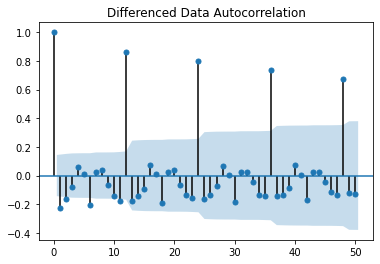

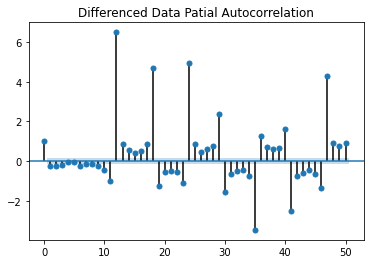

In [139]:
## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.
#Let us look at the ACF and the PACF plots once more.
plot_acf(sparkdf['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(sparkdf['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

In [140]:
import statsmodels.api as sm
manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train_spark['Sparkling'].values,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 0, [1, 2], 12)   Log Likelihood                -779.662
Date:                                 Wed, 09 Dec 2020   AIC                           1571.325
Time:                                         18:17:15   BIC                           1587.249
Sample:                                              0   HQIC                          1577.778
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1070      0.129      0.828      0.408      -0.146       0

In [170]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

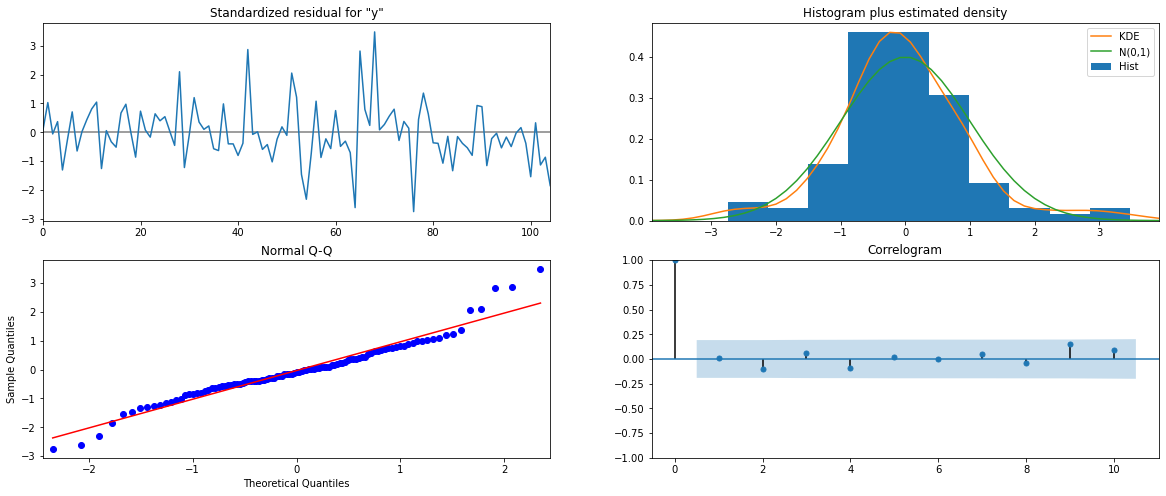

In [171]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

In [142]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test_spark))

In [143]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1428.794474,394.535612,655.518884,2202.070064
1,1219.409452,401.909866,431.680590,2007.138314
2,1693.414782,404.190755,901.215459,2485.614105
3,1572.712817,406.087502,776.795939,2368.629695
4,1430.144599,407.937882,630.601042,2229.688155


In [144]:
rmse = mean_squared_error(test_spark['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

523.6585438503475


In [145]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ManualSARIMA(1,1,1)(1,0,2,12)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

,Test RMSE
Linear Regression,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.05,SimpleExponentialSmoothing",1316.034674
"Alpha=0.02,SimpleExponentialSmoothing",1279.495201
"Alpha=0.53,SimpleExponentialSmoothing",2764.803783


#setting different seasonal orders 

In [146]:
import statsmodels.api as sm
manual_SARIMA_7 = sm.tsa.statespace.SARIMAX(train_spark['Sparkling'].values,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_7 = manual_SARIMA_7.fit(maxiter=1000)
print(results_manual_SARIMA_7.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -694.226
Date:                                 Wed, 09 Dec 2020   AIC                           1400.452
Time:                                         18:17:43   BIC                           1415.648
Sample:                                              0   HQIC                          1406.588
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1906      0.132      1.439      0.150      -0.069       0

In [147]:
predicted_manual_SARIMA_7 = results_manual_SARIMA_7.get_forecast(steps=len(test_spark))

In [148]:
predicted_manual_SARIMA_7.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1598.709133,419.566412,776.374076,2421.044191
1,1378.172060,430.350723,534.700143,2221.643977
2,1877.404789,431.690600,1031.306761,2723.502817
3,1722.836583,432.260992,875.620606,2570.052559
4,1627.633495,432.721093,779.515738,2475.751252


In [149]:
rmse = mean_squared_error(test_spark['Sparkling'],predicted_manual_SARIMA_7.predicted_mean,squared=False)
print(rmse)

323.2129228632323


In [150]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ManualSARIMA(1,1,1)(1,1,2,12)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

,Test RMSE
Linear Regression,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.05,SimpleExponentialSmoothing",1316.034674
"Alpha=0.02,SimpleExponentialSmoothing",1279.495201
"Alpha=0.53,SimpleExponentialSmoothing",2764.803783


In [151]:
import statsmodels.api as sm
manual_SARIMA_8 = sm.tsa.statespace.SARIMAX(train_spark['Sparkling'].values,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_8 = manual_SARIMA_8.fit(maxiter=1000)
print(results_manual_SARIMA_8.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood                -694.378
Date:                                 Wed, 09 Dec 2020   AIC                           1398.756
Time:                                         18:17:55   BIC                           1411.419
Sample:                                              0   HQIC                          1403.869
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1877      0.134      1.398      0.162      -0.075       0

In [152]:
predicted_manual_SARIMA_8 = results_manual_SARIMA_8.get_forecast(steps=len(test_spark))

In [153]:
predicted_manual_SARIMA_8.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1601.276659,419.746328,778.588973,2423.964344
1,1376.563127,430.305563,533.179722,2219.946532
2,1875.833313,431.623891,1029.866031,2721.800594
3,1717.678014,432.196118,870.589187,2564.766840
4,1627.502412,432.662119,779.500241,2475.504582


In [154]:
rmse = mean_squared_error(test_spark['Sparkling'],predicted_manual_SARIMA_8.predicted_mean,squared=False)
print(rmse)

322.08988940522454


In [155]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ManualSARIMA(1,1,1)(0,1,2,12)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

,Test RMSE
Linear Regression,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.05,SimpleExponentialSmoothing",1316.034674
"Alpha=0.02,SimpleExponentialSmoothing",1279.495201
"Alpha=0.53,SimpleExponentialSmoothing",2764.803783


8.Build a table (create a data frame) with all the models built along
with their corresponding parameters and the respective RMSE values on the test data.

In [156]:
resultsDf

,Test RMSE
Linear Regression,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.05,SimpleExponentialSmoothing",1316.034674
"Alpha=0.02,SimpleExponentialSmoothing",1279.495201
"Alpha=0.53,SimpleExponentialSmoothing",2764.803783


In [157]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
"ManualSARIMA(1,1,1)(0,1,2,12)",322.089889
"ManualSARIMA(1,1,1)(1,1,2,12)",323.212923
"Alpha=0.11,Beta=0.01,Gamma=0.46,TripleExponentialSmoothing",378.625761
"Alpha=0.11,Beta=0.05,Gamma=0.36,TripleExponentialSmoothing",403.583080
"ManualSARIMA(1,1,1)(1,0,2,12)",523.658544
"SARIMA(1,1,2)(1,0,2,12)",528.591105
"Alpha=0.5,Beta=0.3,Gamma=0.4, Triple Exponential Smoothing",649.197748
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
"Alpha=0.02&Beta=0.50,DoubleExponentialSmoothing",1274.630824


9.Based on the model-building exercise, build the most optimum model(s) on the complete 
data and predict 12 months into the future with appropriate confidence intervals/bands.

In [158]:
full_data_model = sm.tsa.statespace.SARIMAX(sparkdf['Sparkling'],
                                order=(1,1,1),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood               -1094.911
Date:                                 Wed, 09 Dec 2020   AIC                           2199.821
Time:                                         18:18:28   BIC                           2214.807
Sample:                                     01-31-1980   HQIC                          2205.910
                                          - 07-31-1995                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1036      0.086      1.210      0.226      -0.064       0

In [172]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

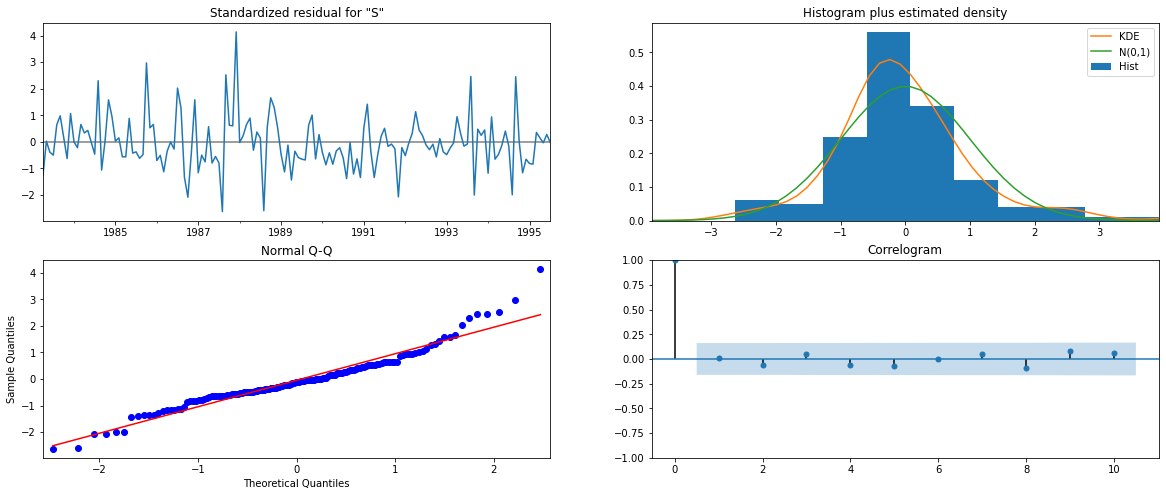

In [173]:
results_full_data_model.plot_diagnostics();

In [160]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [161]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05)

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,1873.987384,391.852708,1105.970188,2642.004579
1995-09-30,2489.387317,395.609355,1714.007229,3264.767405
1995-10-31,3298.934254,396.085648,2522.620648,4075.247859
1995-11-30,3938.505196,396.400419,3161.574650,4715.435741
1995-12-31,6136.228712,396.700166,5358.710674,6913.746751
1996-01-31,1254.576258,396.998189,476.474105,2032.678411
1996-02-29,1583.080501,397.295939,804.394769,2361.766233
1996-03-31,1843.035611,397.593340,1063.766984,2622.304238
1996-04-30,1822.745941,397.890507,1042.894877,2602.597005
1996-05-31,1668.137451,398.187452,887.704387,2448.570515


In [162]:
rmse = mean_squared_error(sparkdf['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 552.1284924475557


In [163]:
pred_dynamic = results_full_data_model.get_prediction(start=pd.to_datetime('1995-08-31'), dynamic=True, full_results=True)

In [164]:
pred_dynamic_ci = pred_dynamic.conf_int()

In [165]:
pred95 = results_full_data_model.get_forecast(steps=12, alpha=0.05)
pred_ci_95 = pred95.conf_int()

In [166]:
forecast_fullmodel_sarima_ses_diff = pred95.predicted_mean

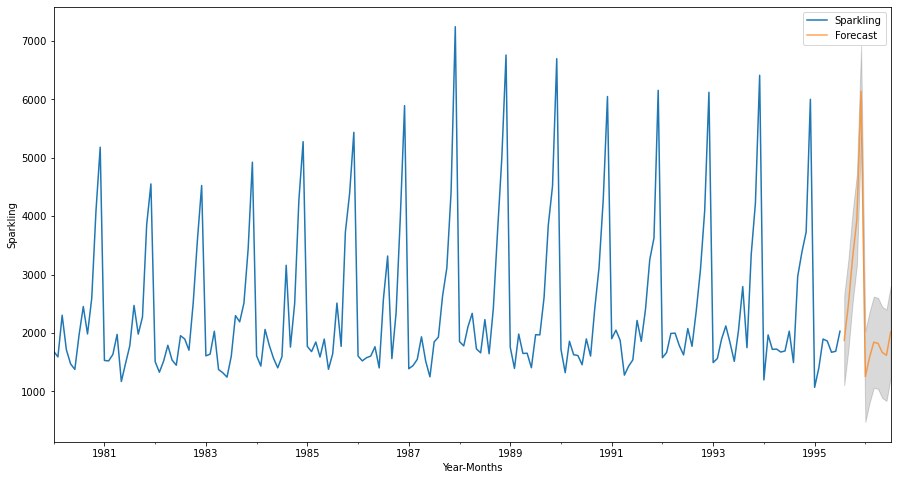

In [176]:
# plot the forecast along with the confidence band

axis =sparkdf.plot(label='Observed', figsize=(15, 8))
forecast_fullmodel_sarima_ses_diff.plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(forecast_fullmodel_sarima_ses_diff.index, pred_ci_95['lower Sparkling'], pred_ci_95['upper Sparkling'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

In [ ]:




We see that our ACF plot at the seasonal interval (6) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.



We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.


We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.



Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.




Here, we have taken alpha=0.05.

We are going to take the seasonal period as 6.
We will keep the p(1) and q(1) parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the lag at which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'q' which comes from the lag at which the ACF plot cuts-off to 0.
Remember to check the ACF and the PACF plots only at multiples of 6 (since 6 is the seasonal period).

By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.

This is a common problem while building models by looking at the ACF and the PACF plots. But we are able to explain the model. 

Please do play around with the data and try out different kinds of transformations and different levels of differencing 
on this data. We have not taken the logarithm of the series and then trying it out.

Please do refer to $\href{https://online.stat.psu.edu/stat510/lesson/4/4.1}{this\ link}$ to read more about 
Seasonal Auto-Regressive Integrtaed Moving Average Models.




The model diagnostics plot looks okay.

## Predict on the Test Set using this model and evaluate the model.



This is where our model building exercise ends. 

Please do try out with 12 as a seasonal parameter and check whether that gives you a better RMSE value. 
Also, try taking different kinds of transformations as well.

Now, we will take our best model and forecast 12 months into the future with appropriate confidence intervals
to see how the predictions look. We have to build our model on the full data for this.

## Building the most optimum model on the Full Data.

full_data_model = sm.tsa.statespace.SARIMAX(df['RetailSales'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

results_full_data_model.plot_diagnostics();